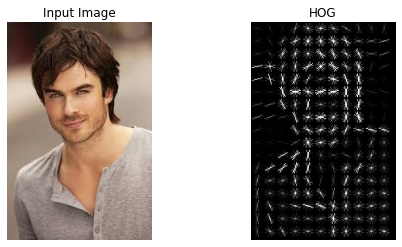

In [55]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

image=cv2.imread('ian somerhalder.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("Input Image")

hog_rescale=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_rescale,cmap=plt.cm.gray)
ax2.set_title("HOG")
plt.show()

In [56]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

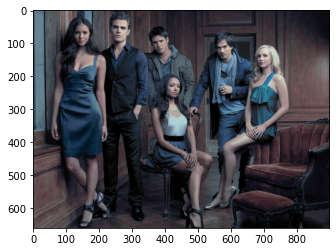

In [57]:
image=cv2.imread('cast.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [58]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} faces in input image".format(number_of_faces))

Found 6 faces in input image


In [59]:
print(face_locations)

[(118, 717, 170, 665), (211, 458, 262, 406), (38, 285, 90, 233), (55, 170, 107, 118), (95, 596, 147, 544), (84, 405, 127, 362)]


A face is located at pixel location Top:665, left:118, bottom:717, right:170
A face is located at pixel location Top:406, left:211, bottom:458, right:262
A face is located at pixel location Top:233, left:38, bottom:285, right:90
A face is located at pixel location Top:118, left:55, bottom:170, right:107
A face is located at pixel location Top:544, left:95, bottom:596, right:147
A face is located at pixel location Top:362, left:84, bottom:405, right:127


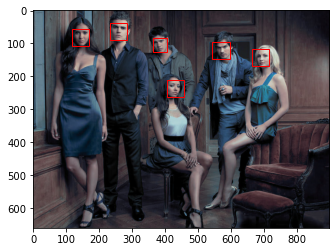

In [60]:
plt.imshow(image)
ax = plt.gca()
for face_location in face_locations:
    top,right,bottom,left = face_location
    x,y,w,h = left,top,right,bottom
    print("A face is located at pixel location Top:{}, left:{}, bottom:{}, right:{}".format(x,y,w,h))
    
    rect = Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
plt.show()



In [61]:
##face recognition

image = cv2.imread("klaus.jpg")
face_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("ian somerhalder.jpg")
ian_somerhalder=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("paul wesley.jpg")
paul_wesley=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("nina.jpg")
nina=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("kat graham.jpg")
kat_graham=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("candice king.jpg")
candice_king=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [62]:
face_demo_encoding=face_recognition.face_encodings(face_demo)[0]
ian_encoding=face_recognition.face_encodings(ian_somerhalder)[0]
paul_encoding=face_recognition.face_encodings(paul_wesley)[0]
nina_encoding=face_recognition.face_encodings(nina)[0]
kat_encoding=face_recognition.face_encodings(kat_graham)[0]
candice_encoding=face_recognition.face_encodings(candice_king)[0]

known_face=[face_demo_encoding,ian_encoding,paul_encoding,nina_encoding,kat_encoding,candice_encoding]

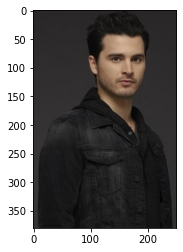

In [79]:
image=cv2.imread("unknown.jpg")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

In [80]:
unknown_image_encoding=face_recognition.face_encodings(unknown_image)

In [81]:
from scipy.spatial import distance
for uke in unknown_image_encoding:
    results=[]
    for kf in known_face:
        d=distance.euclidean(kf,uke)
        results.append(d)
    threshold=0.6
    results=np.array(results)<=threshold
    name="unknown"
    
    if results[0]:
        name="face demo image"
    elif results[1]:
        name="Ian Somerhalder"
    elif results[2]:
        name="Paul Wesley"
    elif results[3]:
        name="Nina"
    elif results[4]:
        name="Kat Graham"
    elif results[5]:
        name="Candice King"
    print(f"Found {name} in the photo")

Found unknown in the photo
